<a href="https://colab.research.google.com/github/Anushadhirde/Restaurant_Rating_Prediction/blob/main/Task1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Restaurant Rating Prediction using Random Forest

In [1]:
# Basic setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# prompt: connect google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Dataset .csv')  # Replace with your file path
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Checking for null

In [7]:

df.isnull().sum()

# Handle missing values (basic strategy)
df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-7-3147193098.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


##  Encode Categorical Columns

In [8]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Label encode
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


## Splitting Data into Train and Test

In [10]:
# Separate features and target
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Random Forest Model

In [11]:
# Initialize and train
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Predict and Evaluate

In [12]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


MSE: 0.03
RMSE: 0.17
MAE: 0.11
R²: 0.99


##  Model Used

- **Algorithm:** Random Forest Regressor
- **Reason for choosing:**
  - Handles non-linearity well
  - Works great with categorical and continuous variables
  - Feature importance is easily interpretable


## Feature Importance Plot

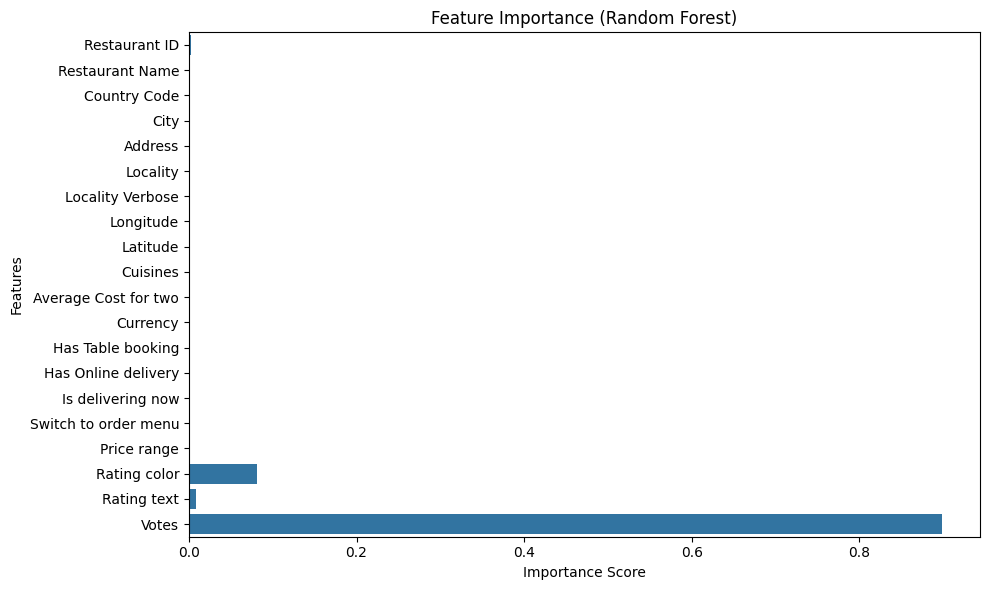

In [13]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


##  Feature Importance

The following features had the highest impact on the prediction:

1. `votes`
2. `price_range`
3. `cuisines`
4. `online_order`

Understanding these insights can help restaurants focus on the right factors to improve their ratings.


In [14]:
# Save cleaned data
df.to_csv('/content/cleaned_restaurant_data.csv', index=False)

# Save model
import joblib
joblib.dump(model, 'restaurant_rating_model.pkl')


['restaurant_rating_model.pkl']

In [16]:
from google.colab import files
files.download('/content/cleaned_restaurant_data.csv')
files.download('/content/restaurant_rating_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##  Conclusion

- The Random Forest Regressor performed extremely well with an R² of 0.99.
- The model can be further improved by:
  - Trying hyperparameter tuning (GridSearchCV)
  - Testing with other regressors (XGBoost, LightGBM)
  - Deploying it as a web app for real-time use

 All files have been saved for reuse and deployment.


##  Author

**Anusha Dhirde**  
B.Tech CSE 3rd year

GitHub: [ https://github.com/Anushadhirde ]
